# Анализ успешности компьютерной игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Есть данные до 2016 года. Планируется кампания на 2017-й. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Описание данных:

+   **Name** — название игры
+   **Platform** — платформа
+   **Year_of_Release** — год релиза
+   **Genre** — жанр игры
+   **NA_sales** — продажи игрокам в Северной Америке (в миллионах долларов)
+   **EU_sales** — продажи игрокам в Европе (в миллионах долларов)
+   **JP_sales** — продажи игрокам в Японии (в миллионах долларов)
+   **Other_players** — продажи игрокам в других странах
+   **Critic_Score** — оценка критиков (максимум 100)
+   **User_Score** — оценка пользователей (максимум 10)
+   **Rating** — рейтинг ESRB

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр c 1994 года. Возрастной рейтинг:

+ «EC» («Early childhood») — «Для детей младшего возраста»
+ «E» («Everyone») — «Для всех»
+ «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
+ «T» («Teen») — «Подросткам 13—19 лет»
+ «M» («Mature») — «От 17 лет»
+ «AO» («Adults Only 18+»
+ «RP» ( «Rating Pending»») — «Рейтинг ожидается»:

In [1]:
%%time 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy

CPU times: total: 2.88 s
Wall time: 8.95 s


In [2]:
df = pd.read_csv(r'C:\Users\Leonid\Desktop\games.csv')
df.head(5)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.describe() # cразу посмотри на наши числовые данные


,Unnamed: 0,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16715.00000,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,8357.00000,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,4825.34921,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,4178.50000,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,8357.00000,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,12535.50000,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,16714.00000,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
df.columns # название столбцов 

Index(['Unnamed: 0', 'Name', 'Platform', 'Year_of_Release', 'Genre',
       'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score',
       'User_Score', 'Rating'],
      dtype='object')

In [5]:
colms = ['Unnamed: 0', 
         'Name', 
         'Platform', 
         'Year_of_Release', 
         'Genre',
         'NA_players_sales', 
         'EU_players_sales', 
         'JP_players_sales', 
         'Other_players_sales', 
         'Critic_Score',
         'User_Score', 
         'Rating'
    
]
df.set_axis(colms, axis='columns', inplace=True) # Изменим название столбцов для удобства 

In [6]:
df.columns = df.columns.str.lower() # сделаем их красивыми 

In [7]:
df.head()

,unnamed: 0,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df.reset_index(drop=True) # перед удалением unnamed: 0 удалим индекс 

,unnamed: 0,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df = df.drop('unnamed: 0', axis=1) # удалим не нужный столбец

In [10]:
df.head()

,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df.info() # глянем на тип данных в наших столбцах 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16715 non-null  object 
 2   year_of_release      16446 non-null  float64
 3   genre                16713 non-null  object 
 4   na_players_sales     16715 non-null  float64
 5   eu_players_sales     16715 non-null  float64
 6   jp_players_sales     16715 non-null  float64
 7   other_players_sales  16715 non-null  float64
 8   critic_score         8137 non-null   float64
 9   user_score           10014 non-null  object 
 10  rating               9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df.shape # глянем сколько строк и столбцов 

(16715, 11)

In [13]:
df.isna().sum() # посмотрим на пропуски 

name                      2
platform                  0
year_of_release         269
genre                     2
na_players_sales          0
eu_players_sales          0
jp_players_sales          0
other_players_sales       0
critic_score           8578
user_score             6701
rating                 6766
dtype: int64

In [14]:
df.duplicated().sum() # дубли 

0

In [15]:
df.loc[df['name'].isnull()] # разберемся с пропусками в name 

,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
df=df.dropna(subset=['name']) # удлаим так как всего две строки + тут много пустых строк 

In [17]:
df.isna().sum()

name                      0
platform                  0
year_of_release         269
genre                     0
na_players_sales          0
eu_players_sales          0
jp_players_sales          0
other_players_sales       0
critic_score           8576
user_score             6699
rating                 6764
dtype: int64

In [18]:
df.loc[df['year_of_release'].isnull()] # либо заменять средним, либо ставить нули,либо удалять 

,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
# можно было как то их выделить, ну или удалить
mean_year_release=df.groupby('platform')['year_of_release'].transform('mean') # не так много, так что вставим среднее

In [20]:
mean_year_release

0        2008.966563
1        1987.153061
2        2008.966563
3        2008.966563
4        1995.958763
            ...     
16710    2010.840735
16711    2009.880682
16712    2014.132867
16713    2003.210851
16714    2014.132867
Name: year_of_release, Length: 16713, dtype: float64

In [21]:
df['year_of_release'].fillna(mean_year_release,inplace=True) # заменили пустые средним 

In [22]:
df.isna().sum() 

name                      0
platform                  0
year_of_release           0
genre                     0
na_players_sales          0
eu_players_sales          0
jp_players_sales          0
other_players_sales       0
critic_score           8576
user_score             6699
rating                 6764
dtype: int64

In [23]:
df.shape


(16713, 11)

In [24]:
df.duplicated().sum() 

0

In [25]:
df['name'].unique() # разберемся с каждым столбцом 

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [26]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
df['year_of_release'].unique()

array([2006.        , 1985.        , 2008.        , 2009.        ,
       1996.        , 1989.        , 1984.        , 2005.        ,
       1999.        , 2007.        , 2010.        , 2013.        ,
       2004.        , 1990.        , 1988.        , 2002.        ,
       2001.        , 2011.        , 1998.        , 2015.        ,
       2012.        , 2014.        , 1992.        , 1997.        ,
       1993.        , 1994.        , 1982.        , 2016.        ,
       2003.        , 1986.        , 2000.        , 2004.58392102,
       1995.        , 1991.        , 1981.        , 1987.        ,
       1980.        , 1983.        , 2008.96656299, 1982.13793103,
       2009.88068182, 2003.2108508 , 2008.91431557, 2010.84073507,
       1998.00588235, 2008.73176865, 2003.63636364, 1995.95876289,
       2008.18528996, 2003.400369  , 2013.12695312, 1998.53164557,
       2014.13286713])

In [28]:
df['year_of_release']=df['year_of_release'].astype(int) # приведем к целочисленным значениям 

In [29]:
df['year_of_release'].unique() 

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [30]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [31]:
df['na_players_sales'].describe()

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_players_sales, dtype: float64

In [32]:
df['na_players_sales'].isna().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16713 non-null  object 
 2   year_of_release      16713 non-null  int32  
 3   genre                16713 non-null  object 
 4   na_players_sales     16713 non-null  float64
 5   eu_players_sales     16713 non-null  float64
 6   jp_players_sales     16713 non-null  float64
 7   other_players_sales  16713 non-null  float64
 8   critic_score         8137 non-null   float64
 9   user_score           10014 non-null  object 
 10  rating               9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


In [34]:
df['eu_players_sales'].describe()

count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_players_sales, dtype: float64

In [35]:
df['jp_players_sales'].describe()

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_players_sales, dtype: float64

In [36]:
df['other_players_sales'].describe()

count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_players_sales, dtype: float64

In [37]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [38]:
df['critic_score'].isna().sum() # не буду трогать, очень много значений 

8576

In [39]:
df['user_score'].unique() # tmd можно заменить на ноль 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [40]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

In [41]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan # заменили 

In [42]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [43]:
df['user_score'].isna().sum() 

9123

In [44]:
df['user_score'] = df['user_score'].astype('float') # заменили на флоат 


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16713 non-null  object 
 1   platform             16713 non-null  object 
 2   year_of_release      16713 non-null  int32  
 3   genre                16713 non-null  object 
 4   na_players_sales     16713 non-null  float64
 5   eu_players_sales     16713 non-null  float64
 6   jp_players_sales     16713 non-null  float64
 7   other_players_sales  16713 non-null  float64
 8   critic_score         8137 non-null   float64
 9   user_score           7590 non-null   float64
 10  rating               9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [46]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр c 1994 года. Возрастной рейтинг:

+ «EC» («Early childhood») — «Для детей младшего возраста»
+ «E» («Everyone») — «Для всех»
+ «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
+ «T» («Teen») — «Подросткам 13—19 лет»
+ «M» («Mature») — «От 17 лет»
+ «AO» («Adults Only 18+»
+ «RP» ( «Rating Pending»») — «Рейтинг ожидается»:


In [47]:
df[df['rating']=='K-A']['rating'].count()

3

In [48]:
df = df.drop(df[df.rating == 'K-A'].index) # Удалим эти строки 

In [49]:
df[df['rating']=='K-A']['rating'].count()

0

In [50]:
df['rating'].isna().sum()

6764

In [51]:
df.sample(10)

,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
2242,NCAA Football 11,X360,2010,Sports,0.86,0.00,0.00,0.06,86.0,7.1,E
13839,Akko ni Omakase! Brain Shock,DS,2006,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2573,Hasbro Family Game Night 3,Wii,2010,Misc,0.46,0.27,0.00,0.07,NaN,NaN,E
4703,F1 2014,PS3,2014,Racing,0.07,0.26,0.02,0.06,62.0,4.1,E
5028,Tales of Hearts,PSV,2013,Role-Playing,0.11,0.11,0.09,0.07,NaN,NaN,NaN
12780,TOCA Race Driver 2: Ultimate Racing Simulator,PS2,2004,Racing,0.03,0.02,0.00,0.01,NaN,NaN,NaN
12110,Alpha and Omega,DS,2010,Action,0.06,0.00,0.00,0.00,NaN,NaN,E
10461,Etrian Odyssey II: Heroes of Lagaard,3DS,2014,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
13270,Child of Light,PS4,2014,Role-Playing,0.00,0.01,0.04,0.00,82.0,8.0,E10+
1985,WWE SmackDown vs. Raw 2010,X360,2009,Fighting,0.56,0.37,0.01,0.10,80.0,8.4,T


In [52]:
df.isna().sum()

name                      0
platform                  0
year_of_release           0
genre                     0
na_players_sales          0
eu_players_sales          0
jp_players_sales          0
other_players_sales       0
critic_score           8574
user_score             9123
rating                 6764
dtype: int64

In [53]:
df.corr()

,year_of_release,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score
year_of_release,1.000000,-0.092980,0.004618,-0.165300,0.038163,0.011575,-0.265458
na_players_sales,-0.092980,1.000000,0.765497,0.450060,0.638853,0.240817,0.085932
eu_players_sales,0.004618,0.765497,1.000000,0.435330,0.722795,0.220804,0.055406
jp_players_sales,-0.165300,0.450060,0.435330,1.000000,0.291285,0.151804,0.125763
other_players_sales,0.038163,0.638853,0.722795,0.291285,1.000000,0.198622,0.057209
critic_score,0.011575,0.240817,0.220804,0.151804,0.198622,1.000000,0.580947
user_score,-0.265458,0.085932,0.055406,0.125763,0.057209,0.580947,1.000000


<AxesSubplot:>

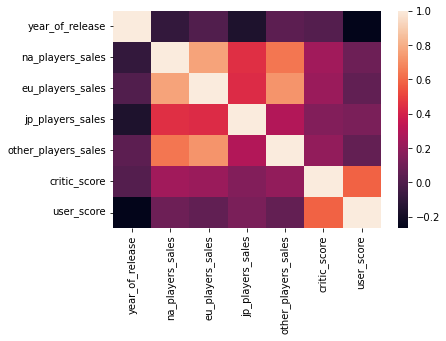

In [54]:
sns.heatmap(df.corr())


Оцените корреляцию между оценками критиков и пользовательскими оценками

# Постройте распределение по годам релиза и опишите полученный результат

In [55]:
df.head(1)

,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


<AxesSubplot:>

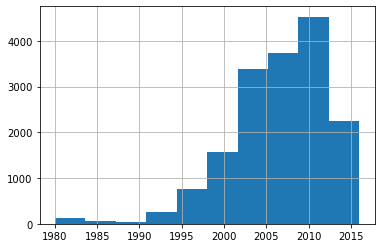

In [56]:
df['year_of_release'].hist()

На графике можно увидеть как развивался рынок игр на компах. С 1995 начинается активное развитие игровой индустрии, появляются более мощные компы, создаются новые игры которые требуют мощностей компа. В 2010 спад, появляются мобильные платформы. Компактность побеждает.

# Постройте график продаж по каждому году; сделайте вывод

In [58]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_players_sales',
       'eu_players_sales', 'jp_players_sales', 'other_players_sales',
       'critic_score', 'user_score', 'rating'],
      dtype='object')

In [59]:
df['total_sales'] = df['na_players_sales'] + df['eu_players_sales'] + df['jp_players_sales'] + df['other_players_sales']
df

,name,platform,year_of_release,genre,na_players_sales,eu_players_sales,jp_players_sales,other_players_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:xlabel='year_of_release'>

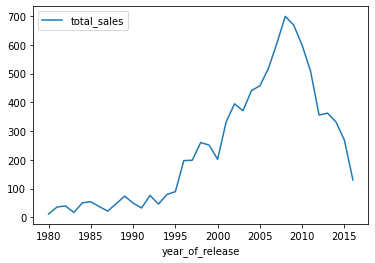

In [60]:
df.groupby('year_of_release').agg({'total_sales':'sum'}).plot()

Пик пришел на 2008 год, дальше рынок продаж падает 

# Постройте ящик с усами по глобальным продажам, опишите полученный результат

(0.0, 2.5)

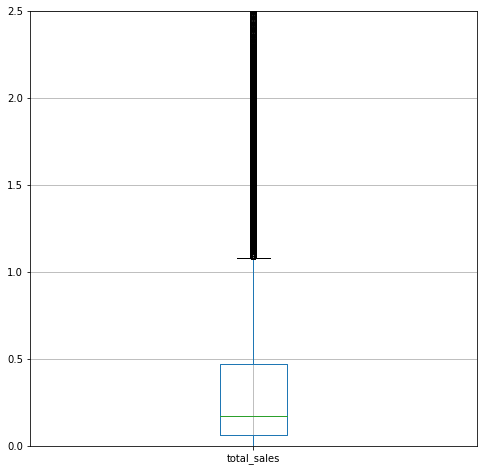

In [61]:
df.boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

большие выбросы, вся масса доходов очень маленькая 

# Узнайте, на какой платформе было выпущено больше всего игр

In [62]:
platf = df.groupby('platform').agg({'name':'count'})
platf

,name
platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2151
GB,98
GBA,822
GC,556
GEN,27


In [63]:
platf.sort_values(by='name', ascending=False).head()

,name
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262


# Определите, игр какого жанра больше всего

In [64]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_players_sales',
       'eu_players_sales', 'jp_players_sales', 'other_players_sales',
       'critic_score', 'user_score', 'rating', 'total_sales'],
      dtype='object')

In [65]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1749
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         681
Puzzle           580
Name: genre, dtype: int64

# Оцените корреляцию между оценками критиков и пользовательскими оценками

In [66]:
corr = df[['critic_score', 'user_score']].corr()
#corr.style.format("{:.2%}")
corr

,critic_score,user_score
critic_score,1.000000,0.580947
user_score,0.580947,1.000000
